# Boston House Price Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing # Scikit-learn (sklearn)

<br>

### 1. Data loading & Preprocessing

In [2]:
df = pd.DataFrame(datasets.load_boston().data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
x_data = datasets.load_boston().data 
y_data = datasets.load_boston().target # 집의 가격

In [4]:
# data scaling
sc = preprocessing.StandardScaler()
x_data = sc.fit_transform(x_data)

print(x_data.shape)
print(y_data.shape)

(506, 13)
(506,)


<br>

### 2. Train / Test split

In [5]:
from sklearn import model_selection

train_data, test_data, train_label, test_label = model_selection.train_test_split(x_data, y_data, test_size=0.3, random_state=0)
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(354, 13)
(152, 13)
(354,)
(152,)


<br>

### 3. Build & Train the model

In [7]:
import tensorflow as tf

from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

In [9]:
import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [10]:
x_data.shape

(506, 13)

In [11]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=13, units=64, activation=None, kernel_initializer=initializers.he_uniform())) # he-uniform initialization
model.add(layers.Activation('elu')) # elu, relu / layers.ELU, layers.LeakyReLU

model.add(layers.Dense(units=64, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=32, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

# dropout
model.add(layers.Dropout(rate=0.4)) 

model.add(layers.Dense(units=1, activation=None)) 

In [12]:
model.compile(optimizer=optimizers.Adam(),
              loss=losses.mean_squared_error, # MSE / mean_absolute_error
              metrics=[metrics.mse])

In [13]:
# verbos=0 불필요한 출력을 끔
history = model.fit(train_data, train_label, batch_size=100, epochs=1000, validation_split=0.3, verbose=0) 

In [14]:
result = model.evaluate(test_data, test_label)

print('loss (mean_squared_error) :', result[0])

152/152 [==============================] - 0s 63us/sample - loss: 17.0156 - mean_squared_error: 17.0156
loss (mean_squared_error) : 17.015566775673314


In [15]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

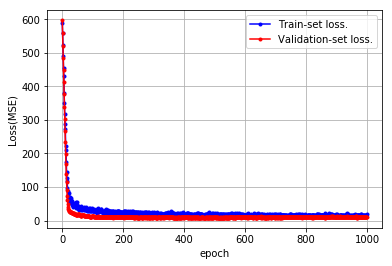

In [16]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

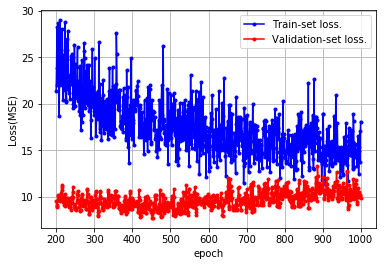

In [17]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

# epoch 200 ~ epoch 1000
plt.plot(x_len[200:], loss[200:], marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len[200:], val_loss[200:], marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

<br>

### Predict

In [19]:
# test data
model.predict(test_data)[:10]

array([[22.526773],
       [28.495056],
       [22.529829],
       [ 9.770072],
       [20.581434],
       [19.274593],
       [22.62303 ],
       [20.30092 ],
       [19.4742  ],
       [ 9.756639]], dtype=float32)

In [21]:
# sample data
sample_data = np.array([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])
model.predict(sample_data)

array([[1401.3972]], dtype=float32)